In [ ]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from IHANKModel import IHANKModelClass
import figures 
import calculations


In [20]:
run_test = False
path = '/Users/emmagundersen/Desktop/Current code/I_HANK_PIGL_BACKUP/fig/0403/'
lvl_path = ['U_hh', 'Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s', 'UC_TH_hh', 'UC_NT_hh', 'iF_s']
paths = ['U_hh','PTH_s', 'PF_s', 'E', 'PF', 'YTH', 'YNT', 'CTF', 'CT', 'CNT','CTH_s', 'i', 'ra', 'iF_s']


In [25]:
# Paths 
path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'PF', 'UC_TH_hh', 'UC_NT_hh', 'EX']
paths_hh = ['U_hh', 'CNT_hh', 'CT_hh', 'CTH', 'CTF', 'EX', 'inc_NT', 'inc_TH', 'ra']
paths_s = ['iF_s', 'rF', 'E', 'PF_s', 'PF', 'CTH_s']

## Initial model

In [ ]:
model = IHANKModelClass(name='baseline')
# model.par.nu = 2.0 
# model.par.etaT = 0.1
# model.par.eta_s = 0.1
# model.par.etaF = 0.1
model.find_ss(do_print=False)
model.compute_jacs()


shock_forigne_interest, shock_PF_s_real, shock_PF_s_taylor = calculations.difine_shocks(model)

In [ ]:
if run_test: 
    print('Running extra')
    print('not implemented')

    # a. Policy 
    figures.plot_policy(model, ['a', 'e', 'ct', 'cnt', 'cth', 'ctf', 'u'])

    # b. Non homothetic expenditure
    a_ = model.ss.a[0,3,:]*model.ss.PNT
    e_ = model.ss.e[0,3,:]*model.ss.PNT
    ect_ = model.ss.ct[0,3,:]*model.ss.PT
    ecnt_ = model.ss.cnt[0,3,:]*model.ss.PNT
    share_ = ect_/(ecnt_+ect_)

    plt.figure()
    plt.plot(e_,share_)
    plt.xlabel('Total expenditure')
    plt.ylabel('Expenditure share tradable goods')
    plt.title('Non-homothetic expenditure shares')

    # c. tests
    model.test_hh_path()
    model.test_path()
    model.test_jacs()



    

# Model with floating exhcange rate 

In [ ]:
model_PF_s_real = model.copy('Real forigne rule')
model_PF_s_real.find_transition_path(shock_PF_s_real, do_end_check=False)

In [ ]:
model_PF_s_taylor = model.copy('Taylor forigne rule')
model_PF_s_taylor.find_transition_path(shock_PF_s_taylor, do_end_check=False)

In [ ]:
# model_PF_s_real.compare_IRFs(models=[model_PF_s_taylor,model_PF_s_real], labels=['Taylor rule', 'Real forigne rule'], varnames=['U_hh'], lvl_value=lvl_path, T_max=100, ncols=3, do_shocks=False, do_targets=False)
model_PF_s_real.compare_IRFs(models=[model_PF_s_taylor,model_PF_s_real], labels=['Taylor rule', 'Real forigne rule'], varnames=model.varlist, lvl_value=lvl_path, T_max=100, ncols=3, do_shocks=False, do_targets=False)


In [ ]:
# 
def plot_UIP(model):
                    
    path = model.path

    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(1,2,1)


    # ax1.plot((1+path.E[1,:])/(1+path.E[0,:]), label= 'RHS= (1+E_t)/(1+E_{t-1})')
    # Corrected code

    ax1.plot((1+path.iF_s[:-1,0])*(path.E[1:, 0]) / ( path.E[:-1, 0]), label='RHS= (E_t)/(E_{t-1})')
    ax1.plot( 1+ path.i, label = 'LHS = 1+i_t', linestyle='--')

    ax1.legend()
    ax1.set_title('Interest rate parity')

    # Nominal exchange rate E absorbing the whole shock is consistent with no change in prices,
    # therefor no change in i and no change in 

    ax2 = fig.add_subplot(1,2,2)
    ax2.plot((path.E[0:50])**(-1), label= '1/E')
    ax2.plot((path.PF_s[:50]), label = 'PF_s', linestyle='--')
    ax2.legend()


## Fixed exchange rate model

In [ ]:
model_fixed = model.copy('Fixed E')
model_fixed.par.float = False
model_fixed.find_ss(do_print=False)
model_fixed.compute_jacs()
model_fixed.find_transition_path(shock_PF_s_taylor, do_end_check=False)
# model_fixed.show_IRFs(varnames=['U_hh'], lvl_value=lvl_path, T_max=100, ncols=3)


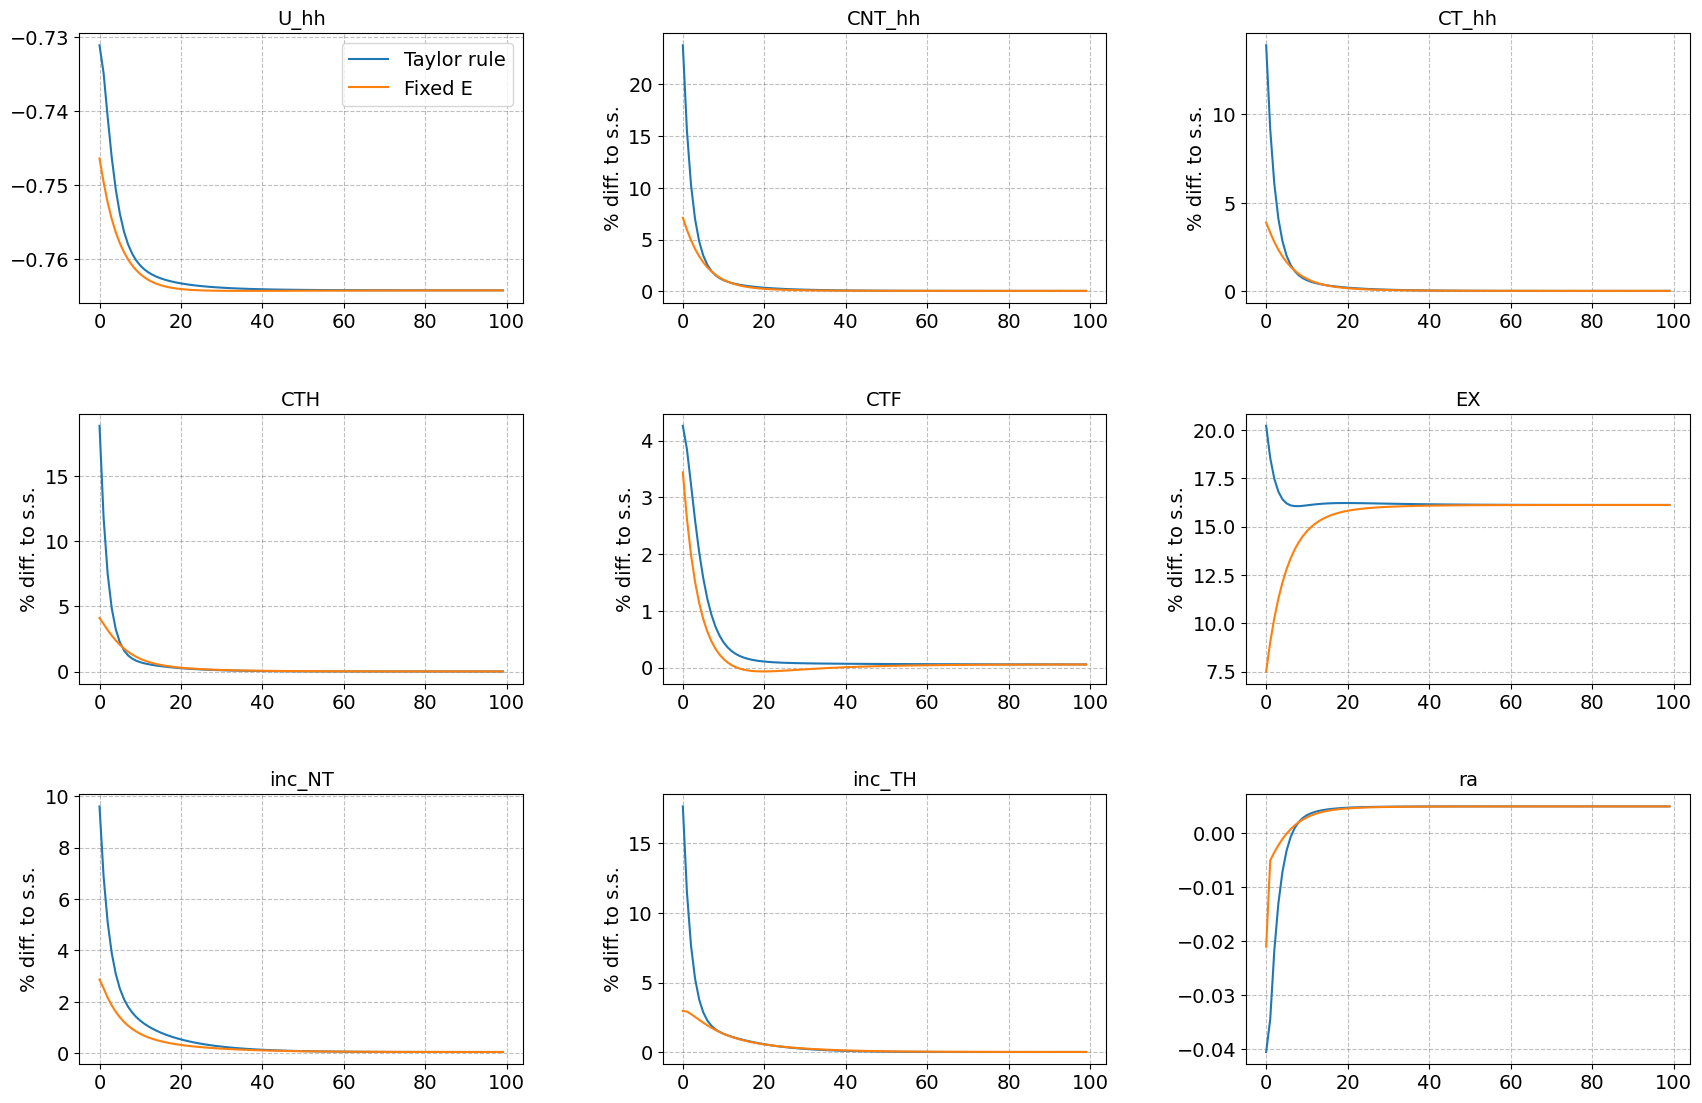

In [23]:
model_PF_s_taylor.compare_IRFs(models=[model_PF_s_taylor,model_fixed], labels=['Taylor rule', 'Fixed E'], varnames=paths_hh, lvl_value=lvl_path, T_max=100, ncols=3, do_shocks=False, do_targets=False, filename=f'{path}Housholds')

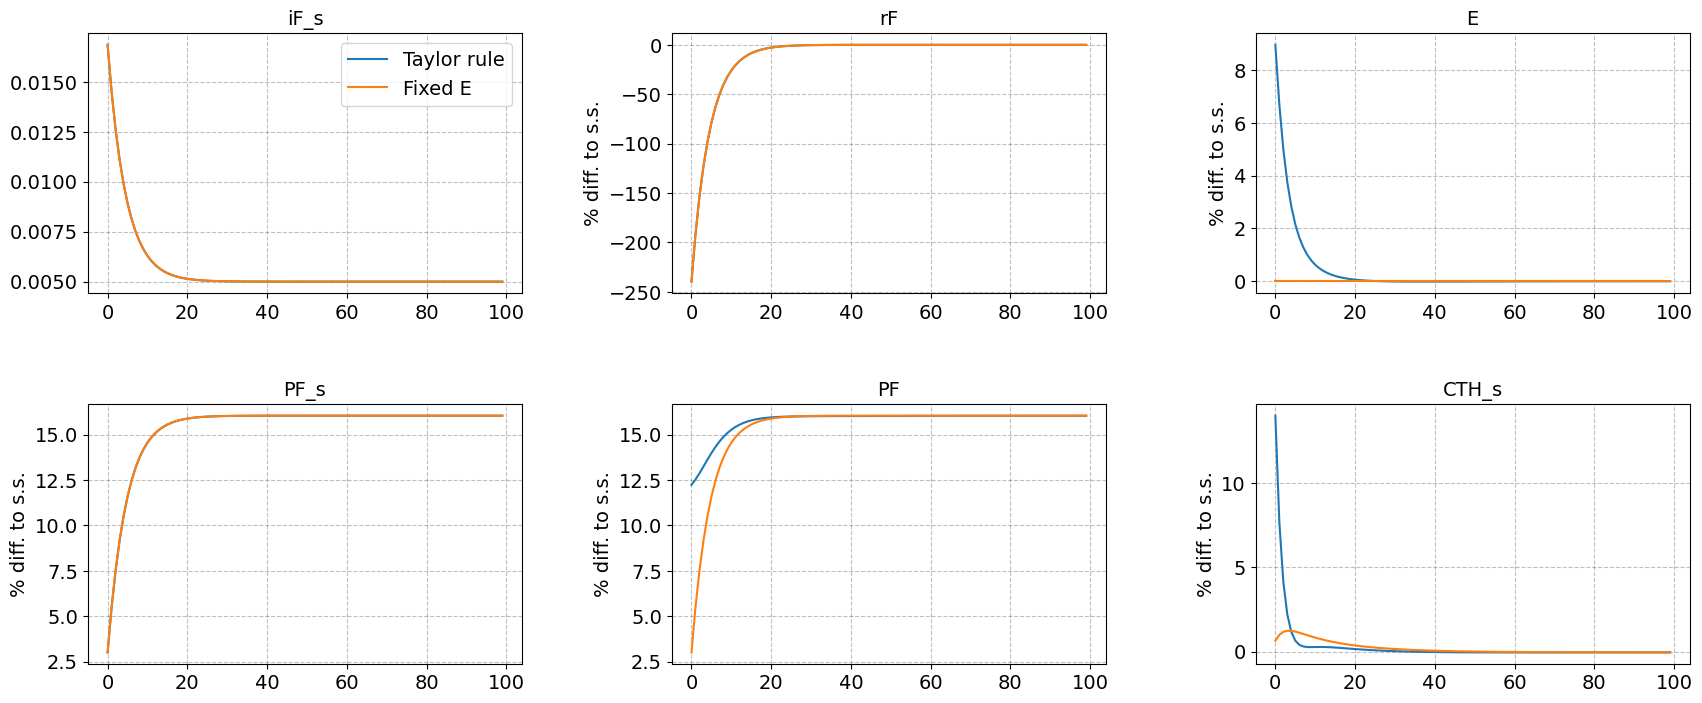

In [22]:
model_PF_s_taylor.compare_IRFs(models=[model_PF_s_taylor,model_fixed], labels=['Taylor rule', 'Fixed E'], varnames=paths_s, lvl_value=lvl_path, T_max=100, ncols=3, do_shocks=False, do_targets=False, filename=f'{path}Forign_economy')

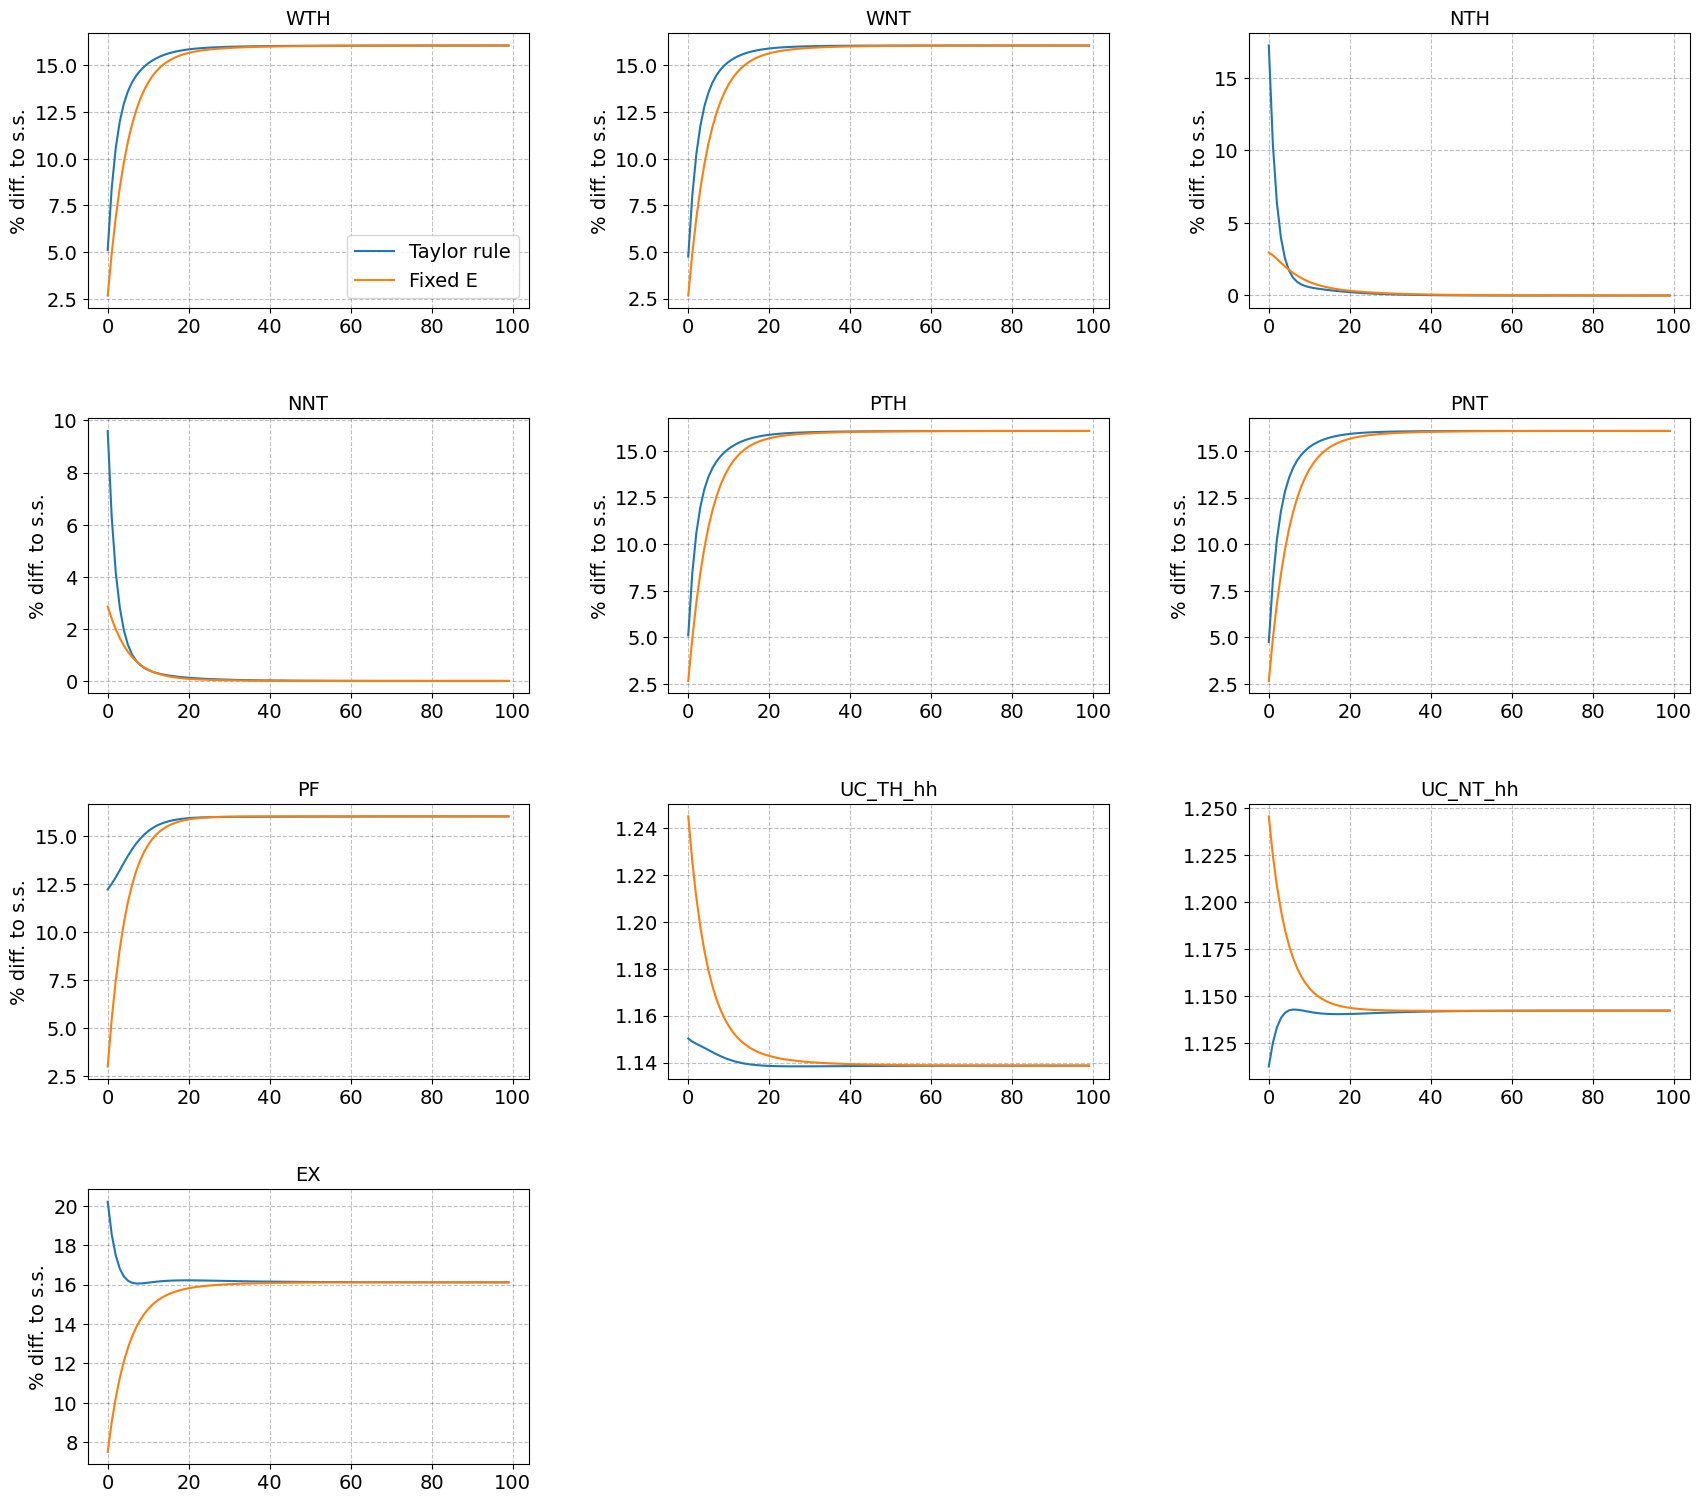

In [26]:
model_PF_s_taylor.compare_IRFs(models=[model_PF_s_taylor,model_fixed], labels=['Taylor rule', 'Fixed E'], varnames=path_philips, lvl_value=lvl_path, T_max=100, ncols=3, do_shocks=False, do_targets=False, filename=f'{path}Labor_market')

In [ ]:
model_high_etas = model.copy(name = 'model with higher eta s')
model_high_etas.par.eta_s = 2.0
model_high_etas.find_ss()
model_high_etas.compute_jacs()
model_high_etas.find_transition_path(shock_PF_s_taylor, do_end_check=False)

In [ ]:
hh_var = ['ra','inc_TH', 'inc_NT', 'p']
models = {'model_PF_s_taylor': model_PF_s_taylor, 'model_PF_s_real': model_PF_s_real}


# models = {'model_PF_s_taylor': model_PF_s_taylor, 'model_fixed': model_fixed}
# inputs_list = [['ra'], ['p'], ['inc_TH', 'inc_NT' ], 'all']
inputs_list = [ 'all', ['ra'], ['p'], ['n_NT','n_TH' ], ['tau'], ['WNT', 'WTH' ], ['WNT', 'WTH' , 'PNT']]
# inputs_list = ['all']

model_titles = {
    'fixed': 'Price shock, fixed E', 
    'model_PF_s_taylor': 'Price shock forign taylor rule', 
    'model_PF_s_real': 'Price shock forign real rule',
    'model_fixed': 'Model sith fixed E'
}

for model_name, model in models.items():

    T_max = 50

    fig, (ax_C_NT, ax_C_TH) = plt.subplots(1, 2, figsize=(16, 4), dpi=100)
    fig.suptitle(f'{model_titles[model_name]}', fontsize=16)

    ax_C_TH.set_title('$Consumption tradeable sector HH, $C_{TH}^{hh}$', fontsize=12)
    ax_C_NT.set_title('Consumption non-tradeable sector HH, $C_{NT}^{hh}$', fontsize=12)

    i_color = 0

    # for use_inputs in [[x] for x in model.inputs_hh]:
    for use_inputs in inputs_list:

        # a. compute
        path_alt = model.decompose_hh_path(do_print=False, use_inputs=use_inputs)

        # b. plot
        if use_inputs is None:
            label = 'No inputs'
            ls = '--'
            color = 'black' 
        elif use_inputs == 'all':
            label = 'All inputs'
            ls = '-'
            color = 'black'
        else:
            label = f'Only effect from {use_inputs[0]}'
            ls = '-'
            color = f'C{i_color}' # use color index directly
            i_color += 1

        # ax_C_NT.plot((path_alt.U_hh[:T_max] - model.ss.U_hh ) , ls=ls, color=color, label=label)
        ax_C_TH.plot((path_alt.CT_hh[:T_max] - model.ss.CT_hh ) , ls=ls, color=color, label=label)
        ax_C_TH.plot((path_alt.CTF_hh[:T_max] - model.ss.CTF_hh ) , ls=ls, color=color, label=label)

    for ax in [ax_C_NT, ax_C_TH]:
        ax.set_ylabel('diff to s.s. abs')
        lgd = ax_C_TH.legend(frameon=True, ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()
  